# Bike Sharing Demand Analysis

**Prashant Brahmbhatt**  
prashant.brahmbhatt32@outlook.com

### About Data

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

In [420]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

In [421]:
df = pd.read_csv('train.csv')

In [422]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Data Fields

**datetime**: hourly + timestamp  
**season**:  
        1 ---- spring  
        2 ---- summer  
        3 ---- fall  
        4 ---- Winter  

**holiday**:  
whether the day is holiday or not  

**workingday**:  
true means day is other than weekend or holiday  

**weather**:  
1--- Clear, Few clouds, Partly cloudy, Partly cloudy  
2--- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3--- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4--- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
      
**temp**:  
temperature in celsius  

**atemp**:  
feels like temperature  

**humidity**:  
relative humidity  

**windspeed**:  
the windspeed

**casuals**:  
No. of non registered users   

**registered**:
No. of registered users

**count**:  
no. of total rentals

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [424]:
df.shape

(10886, 12)

In [425]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Engineering

Extracting data from **datetime** column in different columns

Since the datetime is in **object** form or **string** we convert it first to **datetime** object.  

In [426]:
df['dates_parsed']  = pd.to_datetime(df['datetime'])

In [427]:
df.dtypes

datetime                object
season                   int64
holiday                  int64
workingday               int64
weather                  int64
temp                   float64
atemp                  float64
humidity                 int64
windspeed              float64
casual                   int64
registered               int64
count                    int64
dates_parsed    datetime64[ns]
dtype: object

Since new parsed column is formed from original.  
Now we extract information easily.

In [428]:
df['date'] = df['dates_parsed'].dt.date
df['hour'] = df['dates_parsed'].dt.hour
df['dayname'] = df['dates_parsed'].dt.weekday
df['month'] = df['dates_parsed'].dt.month

In [429]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dates_parsed,date,hour,dayname,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011-01-01,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011-01-01,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011-01-01,4,5,1


We can observe that **dayname** and **month** are unmapped integers so we will map. With 0 as Monday and 6 as Sunday.  
And Months as usual

### Mapping the columns
**dayname**, **month**, **season** and **weather**

In [430]:
df['dayname'] = df['dayname'].map({0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thrusday', 4:'Friday', 5: 'Saturday', 6: 'Sunday'})
df['month'] = df['month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                              8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3: 'Fall', 4: 'Winter'})
df['weather'] = df['weather'].map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [431]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dates_parsed,date,hour,dayname,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01,0,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01,1,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011-01-01,2,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011-01-01,3,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011-01-01,4,Saturday,January


In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime        10886 non-null object
season          10886 non-null object
holiday         10886 non-null int64
workingday      10886 non-null int64
weather         10886 non-null object
temp            10886 non-null float64
atemp           10886 non-null float64
humidity        10886 non-null int64
windspeed       10886 non-null float64
casual          10886 non-null int64
registered      10886 non-null int64
count           10886 non-null int64
dates_parsed    10886 non-null datetime64[ns]
date            10886 non-null object
hour            10886 non-null int64
dayname         10886 non-null object
month           10886 non-null object
dtypes: datetime64[ns](1), float64(3), int64(7), object(6)
memory usage: 1.4+ MB


We can see that our columns are not as categorical variables so we change their datatypes

In [433]:
variableList = ["hour","dayname","month","season","weather","holiday","workingday"]
for var in variableList:
    df[var] = df[var].astype('category')

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime        10886 non-null object
season          10886 non-null category
holiday         10886 non-null category
workingday      10886 non-null category
weather         10886 non-null category
temp            10886 non-null float64
atemp           10886 non-null float64
humidity        10886 non-null int64
windspeed       10886 non-null float64
casual          10886 non-null int64
registered      10886 non-null int64
count           10886 non-null int64
dates_parsed    10886 non-null datetime64[ns]
date            10886 non-null object
hour            10886 non-null category
dayname         10886 non-null category
month           10886 non-null category
dtypes: category(7), datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 927.1+ KB


#### Dropping unnecessary columns

In [435]:
df.drop(['datetime','dates_parsed'], axis= 1, inplace= True)

In [436]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,dayname,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,Saturday,January


#### Looking for Missing Values

I prefer to use heatmap to look for density of missing values.

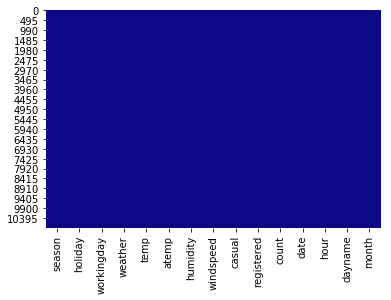

In [439]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'plasma')

We ahve no missing values.